#Import Library

melakukan import librarry untuk persiapan praproses data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.svm import SVR
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from scipy import stats
import pyarrow as pa
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import tensorflow as tf
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

#tambahan
from sklearn.metrics import mean_absolute_percentage_error

##Load Dataaset

In [ ]:
# Melakukan Load dataset
ntt = pd.read_csv('https://raw.githubusercontent.com/Arin1206/datasetFPKel10/main/NTT%202015%20-%202022.csv')
ntt.head(10)

,datetime,total_visitor,total_accomodation
0,1/1/2014,22881.0,9024
1,2/1/2014,19794.0,9058
2,3/1/2014,26642.0,9103
3,4/1/2014,33478.0,9187
4,5/1/2014,36289.0,9247
5,6/1/2014,39.1,9271
6,7/1/2014,41911.0,9348
7,8/1/2014,44722.0,9378
8,9/1/2014,47533.0,9400
9,10/1/2014,50344.0,9495


##Menampilkan Informasi Tipe Data

In [ ]:
ntt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            108 non-null    object 
 1   total_visitor       108 non-null    float64
 2   total_accomodation  108 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


##Menampilkan Missing Value

In [ ]:
ntt.isnull().sum()

datetime              0
total_visitor         0
total_accomodation    0
dtype: int64

## Mengecek Baris Duplikat

Didapatkan dari dataset terdapat 0 baris missing value

In [ ]:
jumlah_baris_duplikat = ntt.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(jumlah_baris_duplikat))

Jumlah baris yang memiliki data sama: 0 baris


##Merubah Format Time dan Set Index

In [ ]:
ntt0 = ntt.copy()

ntt0.head()

,datetime,total_visitor,total_accomodation
0,1/1/2014,22881.0,9024
1,2/1/2014,19794.0,9058
2,3/1/2014,26642.0,9103
3,4/1/2014,33478.0,9187
4,5/1/2014,36289.0,9247


In [ ]:
ntt.rename(columns={'datetime': 'Periode'}, inplace=True)
ntt['Periode'] = pd.to_datetime(ntt['Periode'], format='%m/%d/%Y')
ntt = ntt.set_index('Periode')
ntt.head()

,total_visitor,total_accomodation
Periode,,
2014-01-01,22881.0,9024
2014-02-01,19794.0,9058
2014-03-01,26642.0,9103
2014-04-01,33478.0,9187
2014-05-01,36289.0,9247


# LSTM

In [ ]:
ntt_lstm = ntt.copy()

# print out sample dataset
print(len(ntt_lstm))
ntt_lstm.head()

108


,total_visitor,total_accomodation
Periode,,
2014-01-01,22881.0,9024
2014-02-01,19794.0,9058
2014-03-01,26642.0,9103
2014-04-01,33478.0,9187
2014-05-01,36289.0,9247


In [ ]:
ntt_lstm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2014-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_visitor       108 non-null    float64
 1   total_accomodation  108 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


In [ ]:
ntt_lstm.isna().sum()

total_visitor         0
total_accomodation    0
dtype: int64

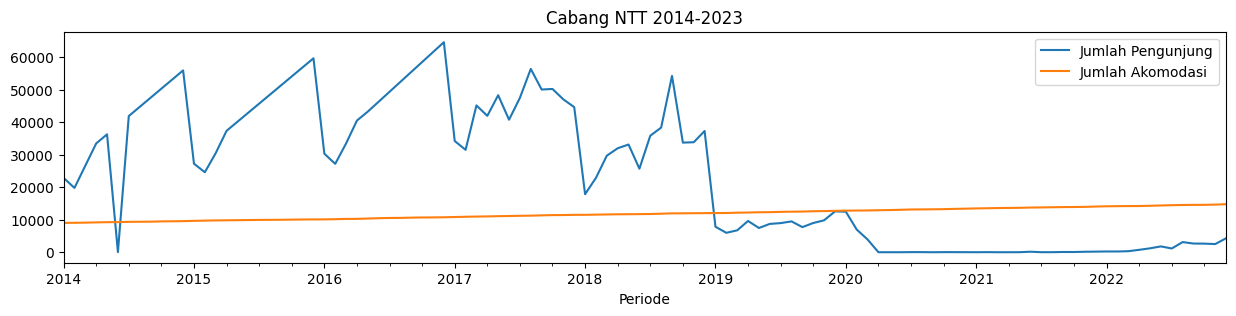

In [ ]:
# Menampilkan plot grafik jumlah pengunjung (total_visitor) seiring periode waktu
ntt_lstm.plot(figsize=(15, 3),legend=True)
plt.title("Cabang NTT 2014-2023")
plt.legend(["Jumlah Pengunjung", "Jumlah Akomodasi"])
plt.show()

In [ ]:
# Normalize the data
scaler_lstm = MinMaxScaler()
ntt_scaled = scaler_lstm.fit_transform(ntt_lstm)

ntt_scaled

array([[3.53981343e-01, 0.00000000e+00],
       [3.06223797e-01, 5.90482807e-03],
       [4.12166030e-01, 1.37200417e-02],
       [5.17922616e-01, 2.83084404e-02],
       [5.61410294e-01, 3.87287253e-02],
       [6.04897972e-04, 4.28968392e-02],
       [6.48385650e-01, 5.62695380e-02],
       [6.91873327e-01, 6.14796804e-02],
       [7.35361005e-01, 6.53004515e-02],
       [7.78848683e-01, 8.17992358e-02],
       [8.22336360e-01, 8.66620354e-02],
       [8.65824038e-01, 9.41299062e-02],
       [4.21649469e-01, 1.09239319e-01],
       [3.80915546e-01, 1.22612018e-01],
       [4.71743065e-01, 1.33205974e-01],
       [5.78041121e-01, 1.39458145e-01],
       [6.21219388e-01, 1.46057659e-01],
       [6.64397655e-01, 1.52483501e-01],
       [7.07575922e-01, 1.60125043e-01],
       [7.50754189e-01, 1.63077457e-01],
       [7.93932456e-01, 1.67419243e-01],
       [8.37141664e-01, 1.75234456e-01],
       [8.80288990e-01, 1.82007642e-01],
       [9.23467257e-01, 1.86696770e-01],
       [4.691594

## 80% Train - 20% Test

In [ ]:
# Split the data into training and testing sets
ntt_val =  ntt_lstm.values
train_lstm80 = int(len(ntt_val) * 0.8)
test_lstm20 = len(ntt_val) - train_lstm80
train80, test20 = ntt_scaled[0:train_lstm80,:], ntt_scaled[train_lstm80:len(ntt_val),:]

print(len(train80), len(test20))

86 22


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back):
        dataX.append(data[i:(i+look_back), 0:data.shape[1]])
        dataY.append(data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 10
X_train80, y_train80 = create_dataset(train80, look_back)
X_test20, y_test20 = create_dataset(test20, look_back)

In [ ]:
# Reshape the output (y) to ensure it is a 2D array
y_train80 = y_train80.reshape(-1, 1)
y_test20 = y_test20.reshape(-1, 1)

# reshape input to be [samples, time steps, features]
X_train80 = np.reshape(X_train80, (X_train80.shape[0], 2, X_train80.shape[1]))
X_test20 = np.reshape(X_test20, (X_test20.shape[0], 2, X_test20.shape[1]))

print("Train X shape:", X_train80.shape)
print("Train Y shape:", y_train80.shape)
print("Test X shape:", X_test20.shape)
print("Test Y shape:", y_test20.shape)

Train X shape: (76, 2, 10)
Train Y shape: (76, 1)
Test X shape: (12, 2, 10)
Test Y shape: (12, 1)


In [ ]:
# Build the LSTM model
lstm80_model = Sequential()

# First LSTM layer
lstm80_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train80.shape[1], look_back)))

# Second LSTM layer
lstm80_model.add(LSTM(100, activation='relu'))

# Output layer
lstm80_model.add(Dense(1))  # Assuming you want to predict 1 feature (visitor)

lstm80_model.compile(optimizer='adam', loss='mse')

In [ ]:
lstm80_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 100)            44400     
                                                                 
 lstm_27 (LSTM)              (None, 100)               80400     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 124901 (487.89 KB)
Trainable params: 124901 (487.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history80 = lstm80_model.fit(
    X_train80, y_train80,
    epochs=100,
    batch_size=32,
    verbose=2,
    validation_split=0.2,  # Use part of the training data as validation
)

Epoch 1/100
2/2 - 3s - loss: 0.3705 - val_loss: 0.0054 - 3s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 0.3407 - val_loss: 0.0054 - 40ms/epoch - 20ms/step
Epoch 3/100
2/2 - 0s - loss: 0.3123 - val_loss: 0.0063 - 40ms/epoch - 20ms/step
Epoch 4/100
2/2 - 0s - loss: 0.2831 - val_loss: 0.0085 - 41ms/epoch - 20ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2527 - val_loss: 0.0128 - 41ms/epoch - 21ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2184 - val_loss: 0.0202 - 41ms/epoch - 20ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1853 - val_loss: 0.0322 - 42ms/epoch - 21ms/step
Epoch 8/100
2/2 - 0s - loss: 0.1486 - val_loss: 0.0505 - 68ms/epoch - 34ms/step
Epoch 9/100
2/2 - 0s - loss: 0.1117 - val_loss: 0.0772 - 42ms/epoch - 21ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0845 - val_loss: 0.1146 - 41ms/epoch - 20ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0693 - val_loss: 0.1589 - 42ms/epoch - 21ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0720 - val_loss: 0.1901 - 43ms/epoch - 22ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0830 - va

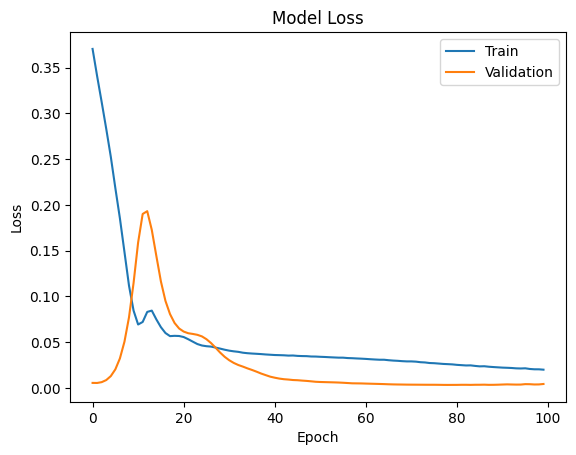

In [ ]:
# Plot training & validation loss values
plt.plot(history80.history['loss'])
plt.plot(history80.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred20_scaled = lstm80_model.predict(X_test20)

print("Shape Hasil Prediksi:", y_pred20_scaled.shape)
print("Hasil Prediksi:", y_pred20_scaled)

1/1 [==============================] - 0s 425ms/step
Shape Hasil Prediksi: (12, 1)
Hasil Prediksi: [[-0.06193934]
 [-0.06418208]
 [-0.06626953]
 [-0.0684899 ]
 [-0.06970906]
 [-0.07082772]
 [-0.0724499 ]
 [-0.07548745]
 [-0.07676193]
 [-0.07888588]
 [-0.08074507]
 [-0.08223142]]


In [ ]:
y_pred20_sc = np.repeat(y_pred20_scaled,2, axis=-1)
y_pred20 = scaler_lstm.inverse_transform(np.reshape(y_pred20_sc,(len(y_pred20_scaled),2)))[:,0]

y_test20_sc = np.repeat(y_test20,2, axis=-1)
y_test20_re = scaler_lstm.inverse_transform(np.reshape(y_test20_sc,(len(y_test20),2)))[:,0]

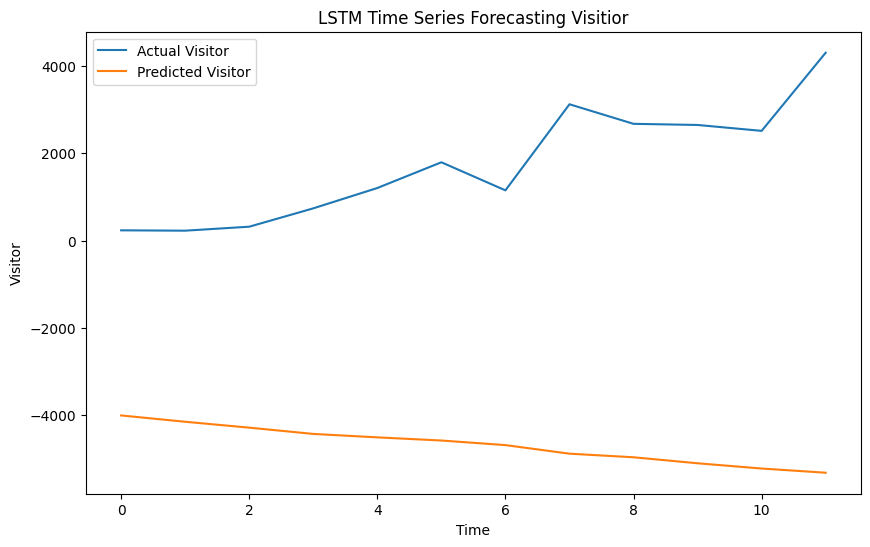

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test20_re, label='Actual Visitor')
plt.plot(y_pred20, label='Predicted Visitor')
plt.title('LSTM Time Series Forecasting Visitior')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()

plt.show()

In [ ]:
print("Original Test Shape:", y_test20.shape)
print("Transformed Test Shape:", y_test20_re.shape)
print("Predicted Shape:", y_pred20.shape)

Original Test Shape: (12, 1)
Transformed Test Shape: (12,)
Predicted Shape: (12,)


In [ ]:
# print("Original Test Subset:", y_test20)
print("Transformed Test Subset:", y_test20_re)
print("Predicted Subset:", y_pred20)

Transformed Test Subset: [ 234.  226.  317.  737. 1203. 1792. 1149. 3120. 2672. 2646. 2511. 4300.]
Predicted Subset: [-4003.6973 -4148.6655 -4283.596  -4427.1187 -4505.9243 -4578.2334
 -4683.089  -4879.433  -4961.8145 -5099.1045 -5219.281  -5315.357 ]


In [ ]:
# Calculate MSE, RMSE, MAPE
mse1 = mean_squared_error(y_test20_re, y_pred20).round(2)
mae1 = mean_absolute_error(y_test20_re, y_pred20).round(2)
mape1 = mean_absolute_percentage_error(y_test20_re, y_pred20).round(2)

print(f"Mean Squared Error (MSE): {mse1}")
print(f"Mean Absolute Error (MAE): {mae1}")
print(f"Mean Absolute Percetange Error (MAPE): {mape1} %")

Mean Squared Error (MSE): 43881613.39
Mean Absolute Error (MAE): 6417.69
Mean Absolute Percetange Error (MAPE): 7.17 %


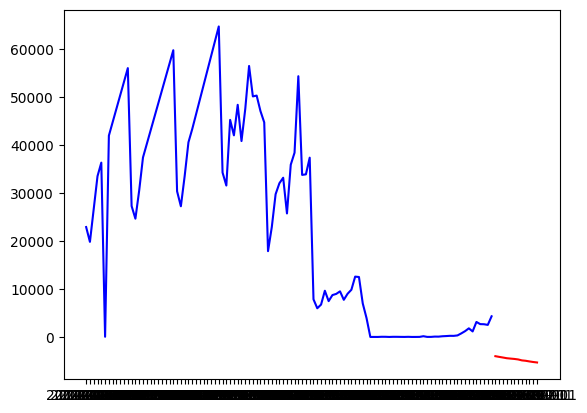

In [ ]:
# Assuming your predictions are for 12 months
num_predictions = 12

# create a list of dates for next 12 months
date_index = pd.date_range(start='2023-01-01', periods=num_predictions, freq='MS')
date_index = pd.to_datetime(date_index, format='%Y-%m-%d')
date_index = date_index.strftime('%Y-%m-%d')

# Create a DataFrame from the predictions array
df_test = pd.DataFrame(y_pred20, columns=['total_visitor'], index=date_index)

ntt_copy = ntt0.copy()
ntt_copy['datetime'] = pd.to_datetime(ntt_copy['datetime'], format='%d/%m/%Y')
ntt_copy['datetime'] = ntt_copy['datetime'].dt.strftime('%Y-%m-%d')
ntt_copy.set_index("datetime", inplace = True)


# Plot the actual values from the training set
fig, ax = plt.subplots()
ax.plot(ntt_copy['total_visitor'], color='blue')
# Plot the predicted values
ax.plot(df_test['total_visitor'], color='red')
from datetime import datetime
# ax.set_xlim([datetime.date(datetime.strptime('2023-01-01', '%Y-%m-%d')), datetime.date(datetime.strptime('2023-12-01', '%Y-%m-%d'))])
plt.show()


In [ ]:
# Creating a DataFrame from the array
res20_df = pd.DataFrame(y_pred20, columns=['Prediksi Jumlah Pengunjung'])


# Membulatkan nilai dalam kolom 'y_pred' menjadi integer
res20_df['Prediksi Jumlah Pengunjung'] = res20_df['Prediksi Jumlah Pengunjung'].round().astype(int)

# Displaying the DataFrame
print(res20_df)

    Prediksi Jumlah Pengunjung
0                        -4004
1                        -4149
2                        -4284
3                        -4427
4                        -4506
5                        -4578
6                        -4683
7                        -4879
8                        -4962
9                        -5099
10                       -5219
11                       -5315


In [ ]:
resdate = []
resdate = pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
                           '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'])

# Creating a DataFrame from the array
resdate_df = pd.DataFrame(resdate, columns=['Datetime'])

# Displaying the DataFrame
print(resdate_df)

     Datetime
0  2023-01-01
1  2023-02-01
2  2023-03-01
3  2023-04-01
4  2023-05-01
5  2023-06-01
6  2023-07-01
7  2023-08-01
8  2023-09-01
9  2023-10-01
10 2023-11-01
11 2023-12-01


In [ ]:
# Mengonversi indeks result_df menjadi kolom 'Periode'
res20_df['Datetime'] = res20_df.index

# Menggabungkan DataFrame result_df dan resdate_df menggunakan pd.concat
result20 = pd.concat([resdate_df, res20_df[['Prediksi Jumlah Pengunjung']]], axis=1)

result20

,Datetime,Prediksi Jumlah Pengunjung
0,2023-01-01,-4004
1,2023-02-01,-4149
2,2023-03-01,-4284
3,2023-04-01,-4427
4,2023-05-01,-4506
5,2023-06-01,-4578
6,2023-07-01,-4683
7,2023-08-01,-4879
8,2023-09-01,-4962
9,2023-10-01,-5099


## 70% Train - 30% Test

In [ ]:
# Split the data into training and testing sets
ntt_val =  ntt_lstm.values
train_lstm70 = int(len(ntt_val) * 0.7)
test_lstm30 = len(ntt_val) - train_lstm70
train70, test30 = ntt_scaled[0:train_lstm70,:], ntt_scaled[train_lstm70:len(ntt_val),:]

print(len(train70), len(test30))

75 33


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        dataX.append(data[i:(i+look_back), 0:data.shape[1]])
        dataY.append(data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 12
X_train70, y_train70 = create_dataset(train70, look_back)
X_test30, y_test30 = create_dataset(test30, look_back)

In [ ]:
# Reshape the output (y) to ensure it is a 2D array
y_train70 = y_train70.reshape(-1, 1)
y_test30 = y_test30.reshape(-1, 1)

# reshape input to be [samples, time steps, features]
X_train70 = np.reshape(X_train70, (X_train70.shape[0], 2, X_train70.shape[1]))
X_test30 = np.reshape(X_test30, (X_test30.shape[0], 2, X_test30.shape[1]))

print("Train X shape:", X_train70.shape)
print("Train Y shape:", y_train70.shape)
print("Test X shape:", X_test30.shape)
print("Test Y shape:", y_test30.shape)

Train X shape: (62, 2, 12)
Train Y shape: (62, 1)
Test X shape: (20, 2, 12)
Test Y shape: (20, 1)


In [ ]:
# Build the LSTM model
lstm70_model = Sequential()

# First LSTM layer
lstm70_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train70.shape[1], look_back)))

# Second LSTM layer
lstm70_model.add(LSTM(100, activation='relu'))

# Output layer
lstm70_model.add(Dense(1))  # Assuming you want to predict 1 feature (visitor)

# optimizer = Adam(learning_rate=0.001)
lstm70_model.compile(optimizer='adam', loss='mse')

In [ ]:
lstm70_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 256)            275456    
                                                                 
 lstm_29 (LSTM)              (None, 200)               365600    
                                                                 
 dense_14 (Dense)            (None, 1)                 201       
                                                                 
Total params: 641257 (2.45 MB)
Trainable params: 641257 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history70 = lstm70_model.fit(
    X_train70, y_train70,
    epochs=100,
    batch_size=32,
    verbose=2,
    validation_split=0.3,  # Use part of the training data as validation
)

Epoch 1/100
2/2 - 3s - loss: 0.4520 - val_loss: 0.1002 - 3s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 0.4076 - val_loss: 0.0855 - 62ms/epoch - 31ms/step
Epoch 3/100
2/2 - 0s - loss: 0.3610 - val_loss: 0.0703 - 76ms/epoch - 38ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3104 - val_loss: 0.0553 - 78ms/epoch - 39ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2491 - val_loss: 0.0438 - 61ms/epoch - 30ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1805 - val_loss: 0.0441 - 64ms/epoch - 32ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1087 - val_loss: 0.0738 - 66ms/epoch - 33ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0529 - val_loss: 0.1570 - 60ms/epoch - 30ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0404 - val_loss: 0.2590 - 62ms/epoch - 31ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0745 - val_loss: 0.2666 - 68ms/epoch - 34ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0755 - val_loss: 0.2077 - 71ms/epoch - 35ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0514 - val_loss: 0.1474 - 72ms/epoch - 36ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0354 - va

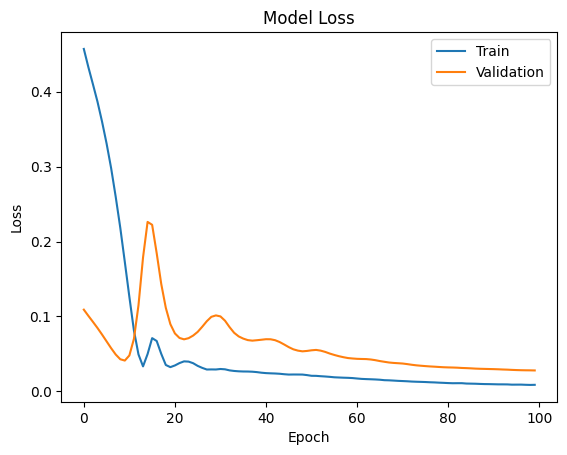

In [ ]:
# Plot training & validation loss values
plt.plot(history70.history['loss'])
plt.plot(history70.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred30_scaled = lstm70_model.predict(X_test30)

print("Shape Hasil Prediksi:", y_pred30_scaled.shape)
print("Hasil Prediksi:", y_pred30_scaled)

1/1 [==============================] - 0s 309ms/step
Shape Hasil Prediksi: (20, 1)
Hasil Prediksi: [[0.16364329]
 [0.16428101]
 [0.16500986]
 [0.1658352 ]
 [0.16650249]
 [0.16720378]
 [0.16793716]
 [0.16867527]
 [0.16939726]
 [0.17000593]
 [0.17076954]
 [0.17155887]
 [0.17217372]
 [0.17289221]
 [0.17370568]
 [0.17444023]
 [0.17529425]
 [0.17667857]
 [0.1776485 ]
 [0.1786266 ]]


In [ ]:
y_pred30_sc = np.repeat(y_pred30_scaled,2, axis=-1)
y_pred30 = scaler_lstm.inverse_transform(np.reshape(y_pred30_sc,(len(y_pred30_scaled),2)))[:,0]

y_test30_sc = np.repeat(y_test30,2, axis=-1)
y_test30_re = scaler_lstm.inverse_transform(np.reshape(y_test30_sc,(len(y_test30),2)))[:,0]

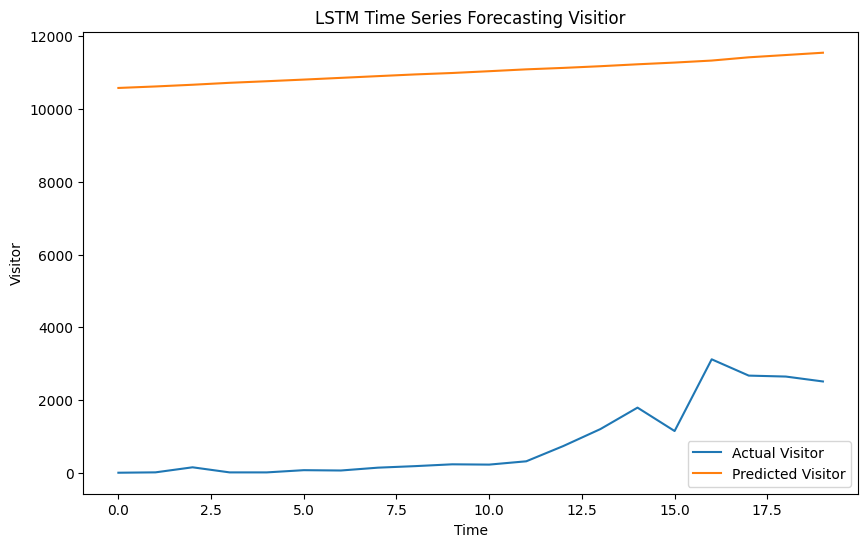

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test30_re, label='Actual Visitor')
plt.plot(y_pred30, label='Predicted Visitor')
plt.title('LSTM Time Series Forecasting Visitior')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()

plt.show()

In [ ]:
print("Original Test Shape:", y_test30.shape)
print("Transformed Test Shape:", y_test30_re.shape)
print("Predicted Shape:", y_pred30.shape)

Original Test Shape: (20, 1)
Transformed Test Shape: (20,)
Predicted Shape: (20,)


In [ ]:
# print("Original Test Subset:", y_test20)
print("Transformed Test Subset:", y_test30_re)
print("Predicted Subset:", y_pred30)

Transformed Test Subset: [3.000e+00 1.300e+01 1.520e+02 1.200e+01 1.200e+01 7.300e+01 6.400e+01
 1.420e+02 1.840e+02 2.340e+02 2.260e+02 3.170e+02 7.370e+02 1.203e+03
 1.792e+03 1.149e+03 3.120e+03 2.672e+03 2.646e+03 2.511e+03]
Predicted Subset: [10577.738 10618.96  10666.072 10719.422 10762.555 10807.886 10855.29
 10903.001 10949.67  10989.014 11038.372 11089.394 11129.138 11175.58
 11228.161 11275.643 11330.845 11420.326 11483.021 11546.244]


In [ ]:
# Calculate MSE, MAE, MAPE
mse2 = mean_squared_error(y_test30_re, y_pred30).round(2)
mae2 = mean_absolute_error(y_test30_re, y_pred30).round(2)
mape2 = mean_absolute_percentage_error(y_test30_re, y_pred30).round(2)

print(f"Mean Squared Error (MSE): {mse2}")
print(f"Mean Absolute Error (MAE): {mae2}")
print(f"Mean Absolute Percetange Error (MAPE): {mape2} %")

Mean Squared Error (MSE): 103990492.5
Mean Absolute Error (MAE): 10165.22
Mean Absolute Percetange Error (MAPE): 341.26 %


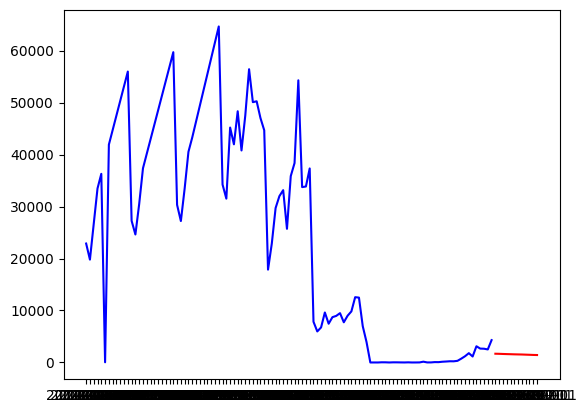

In [ ]:
# Assuming your predictions are for 12 months
num_predictions = 12

# create a list of dates for next 12 months
date_index = pd.date_range(start='2023-01-01', periods=num_predictions, freq='MS')
date_index = pd.to_datetime(date_index, format='%Y-%m-%d')
date_index = date_index.strftime('%Y-%m-%d')

# Create a DataFrame from the predictions array
y_pred30_12 = y_pred30[-12:]
df_test = pd.DataFrame(y_pred30_12, columns=['total_visitor'], index=date_index)

ntt_copy = ntt0.copy()
ntt_copy['datetime'] = pd.to_datetime(ntt_copy['datetime'], format='%d/%m/%Y')
ntt_copy['datetime'] = ntt_copy['datetime'].dt.strftime('%Y-%m-%d')
ntt_copy.set_index("datetime", inplace = True)


# Plot the actual values from the training set
fig, ax = plt.subplots()
ax.plot(ntt_copy['total_visitor'], color='blue')
# Plot the predicted values
ax.plot(df_test['total_visitor'], color='red')
from datetime import datetime
# ax.set_xlim([datetime.date(datetime.strptime('2023-01-01', '%Y-%m-%d')), datetime.date(datetime.strptime('2023-12-01', '%Y-%m-%d'))])
plt.show()


In [ ]:
# Creating a DataFrame from the array
res30_df = pd.DataFrame(y_pred30, columns=['Prediksi Jumlah Pengunjung'])

# Membulatkan nilai dalam kolom 'y_pred' menjadi integer
res30_df['Prediksi Jumlah Pengunjung'] = res30_df['Prediksi Jumlah Pengunjung'].round().astype(int)

# Displaying the DataFrame
print(res30_df)

    Prediksi Jumlah Pengunjung
0                         1927
1                         1899
2                         1870
3                         1839
4                         1809
5                         1778
6                         1744
7                         1711
8                         1684
9                         1666
10                        1638
11                        1612
12                        1591
13                        1567
14                        1550
15                        1534
16                        1505
17                        1480
18                        1450
19                        1431


In [ ]:
# Mengonversi indeks result_df menjadi kolom 'Periode'
res30_df['Datetime'] = res30_df.index

# Menggabungkan DataFrame result_df dan resdate_df menggunakan pd.concat
result30 = pd.concat([resdate_df, res30_df[['Prediksi Jumlah Pengunjung']]], axis=1)

result30

,Datetime,Prediksi Jumlah Pengunjung
0,2023-01-01,1927
1,2023-02-01,1899
2,2023-03-01,1870
3,2023-04-01,1839
4,2023-05-01,1809
5,2023-06-01,1778
6,2023-07-01,1744
7,2023-08-01,1711
8,2023-09-01,1684
9,2023-10-01,1666


## 60% Train - 40% Test

In [ ]:
# Split the data into training and testing sets
ntt_val =  ntt_lstm.values
train_lstm60 = int(len(ntt_val) * 0.6)
test_lstm40 = len(ntt_val) - train_lstm60
train60, test40 = ntt_scaled[0:train_lstm60,:], ntt_scaled[train_lstm60:len(ntt_val),:]

print(len(train60), len(test40))

64 44


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back):
        dataX.append(data[i:(i+look_back), 0:data.shape[1]])
        dataY.append(data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 12
X_train60, y_train60 = create_dataset(train60, look_back)
X_test40, y_test40 = create_dataset(test40, look_back)

In [ ]:
# Reshape the output (y) to ensure it is a 2D array
y_train60 = y_train60.reshape(-1, 1)
y_test40 = y_test40.reshape(-1, 1)

# reshape input to be [samples, time steps, features]
X_train60 = np.reshape(X_train60, (X_train60.shape[0], 2, X_train60.shape[1]))
X_test40 = np.reshape(X_test40, (X_test40.shape[0], 2, X_test40.shape[1]))

print("Train X shape:", X_train60.shape)
print("Train Y shape:", y_train60.shape)
print("Test X shape:", X_test40.shape)
print("Test Y shape:", y_test40.shape)

Train X shape: (52, 2, 12)
Train Y shape: (52, 1)
Test X shape: (32, 2, 12)
Test Y shape: (32, 1)


In [ ]:
# Build the LSTM model
lstm60_model = Sequential()

# First LSTM layer
lstm60_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train60.shape[1], look_back)))

# Second LSTM layer
lstm60_model.add(LSTM(100, activation='relu'))

# Output layer
lstm60_model.add(Dense(1))  # Assuming you want to predict 1 feature (visitor)

# optimizer = Adam(learning_rate=0.001)
lstm60_model.compile(optimizer='adam', loss='mse')

In [ ]:
lstm60_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 512)            1075200   
                                                                 
 lstm_31 (LSTM)              (None, 512)               2099200   
                                                                 
 dense_15 (Dense)            (None, 1)                 513       
                                                                 
Total params: 3174913 (12.11 MB)
Trainable params: 3174913 (12.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history60 = lstm60_model.fit(
    X_train60, y_train60,
    epochs=100,
    batch_size=32,
    verbose=2,
    validation_split=0.4,  # Use part of the training data as validation
)

Epoch 1/100
1/1 - 6s - loss: 0.5009 - val_loss: 0.2664 - 6s/epoch - 6s/step
Epoch 2/100
1/1 - 0s - loss: 0.4486 - val_loss: 0.2332 - 121ms/epoch - 121ms/step
Epoch 3/100
1/1 - 0s - loss: 0.4055 - val_loss: 0.2008 - 122ms/epoch - 122ms/step
Epoch 4/100
1/1 - 0s - loss: 0.3619 - val_loss: 0.1654 - 113ms/epoch - 113ms/step
Epoch 5/100
1/1 - 0s - loss: 0.3130 - val_loss: 0.1274 - 110ms/epoch - 110ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2574 - val_loss: 0.0897 - 117ms/epoch - 117ms/step
Epoch 7/100
1/1 - 0s - loss: 0.1961 - val_loss: 0.0588 - 110ms/epoch - 110ms/step
Epoch 8/100
1/1 - 0s - loss: 0.1324 - val_loss: 0.0468 - 108ms/epoch - 108ms/step
Epoch 9/100
1/1 - 0s - loss: 0.0734 - val_loss: 0.0747 - 113ms/epoch - 113ms/step
Epoch 10/100
1/1 - 0s - loss: 0.0322 - val_loss: 0.1714 - 113ms/epoch - 113ms/step
Epoch 11/100
1/1 - 0s - loss: 0.0294 - val_loss: 0.3233 - 117ms/epoch - 117ms/step
Epoch 12/100
1/1 - 0s - loss: 0.0716 - val_loss: 0.4056 - 131ms/epoch - 131ms/step
Epoch 13/100
1/1 - 

In [ ]:
# Plot training & validation loss values
plt.plot(history60.history['loss'])
plt.plot(history60.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred40_scaled = lstm60_model.predict(X_test40)

print("Shape Hasil Prediksi:", y_pred40_scaled.shape)
print("Hasil Prediksi:", y_pred40_scaled)

In [ ]:
y_pred40_sc = np.repeat(y_pred40_scaled,2, axis=-1)
y_pred40 = scaler_lstm.inverse_transform(np.reshape(y_pred40_sc,(len(y_pred40_scaled),2)))[:,0]

y_test40_sc = np.repeat(y_test40,2, axis=-1)
y_test40_re = scaler_lstm.inverse_transform(np.reshape(y_test40_sc,(len(y_test40),2)))[:,0]

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test40_re, label='Actual Visitor')
plt.plot(y_pred40, label='Predicted Visitor')
plt.title('LSTM Time Series Forecasting Visitior')
plt.xlabel('Time')
plt.ylabel('Visitor')
plt.legend()

plt.show()

In [ ]:
print("Original Test Shape:", y_test40.shape)
print("Transformed Test Shape:", y_test40_re.shape)
print("Predicted Shape:", y_pred40.shape)

In [ ]:
# print("Original Test Subset:", y_test20)
print("Transformed Test Subset:", y_test40_re)
print("Predicted Subset:", y_pred40)

In [ ]:
# Calculate MSE, MAE, MAPE
mse3 = mean_squared_error(y_test40_re, y_pred40).round(2)
mae3 = mean_absolute_error(y_test40_re, y_pred40).round(2)
mape3 = mean_absolute_percentage_error(y_test40_re, y_pred40).round(2)

print(f"Mean Squared Error (MSE): {mse3}")
print(f"Mean Absolute Error (MAE): {mae3}")
print(f"Mean Absolute Percetange Error (MAPE): {mape3} %")

In [ ]:
# Assuming your predictions are for 12 months
num_predictions = 12

# create a list of dates for next 12 months
date_index = pd.date_range(start='2023-01-01', periods=num_predictions, freq='MS')
date_index = pd.to_datetime(date_index, format='%Y-%m-%d')
date_index = date_index.strftime('%Y-%m-%d')

# Create a DataFrame from the predictions array
y_pred40_12 = y_pred40[-12:]
df_test = pd.DataFrame(y_pred40_12, columns=['total_visitor'], index=date_index)

ntt_copy = ntt0.copy()
ntt_copy['datetime'] = pd.to_datetime(ntt_copy['datetime'], format='%d/%m/%Y')
ntt_copy['datetime'] = ntt_copy['datetime'].dt.strftime('%Y-%m-%d')
ntt_copy.set_index("datetime", inplace = True)


# Plot the actual values from the training set
fig, ax = plt.subplots()
ax.plot(ntt_copy['total_visitor'], color='blue')
# Plot the predicted values
ax.plot(df_test['total_visitor'], color='red')
from datetime import datetime
# ax.set_xlim([datetime.date(datetime.strptime('2023-01-01', '%Y-%m-%d')), datetime.date(datetime.strptime('2023-12-01', '%Y-%m-%d'))])
plt.show()


In [ ]:
# Creating a DataFrame from the array
res40_df = pd.DataFrame(y_pred40, columns=['Prediksi Jumlah Pengunjung'])


# Membulatkan nilai dalam kolom 'y_pred' menjadi integer
res40_df['Prediksi Jumlah Pengunjung'] = res40_df['Prediksi Jumlah Pengunjung'].round().astype(int)

# Displaying the DataFrame
print(res40_df)

In [ ]:
# Mengonversi indeks result_df menjadi kolom 'Periode'
res40_df['Datetime'] = res40_df.index

# Menggabungkan DataFrame result_df dan resdate_df menggunakan pd.concat
result40 = pd.concat([resdate_df, res40_df[['Prediksi Jumlah Pengunjung']]], axis=1)

result40

## Kesimpulan LSTM

In [ ]:
# plt.figure(figsize=(15, 5))

# # Scenario 1
# plt.subplot(1, 3, 1)
# sns.lineplot(data=original, x='Datetime', y='jumlah_penderita', label='Original')
# sns.lineplot(data=df_forecast, x='Date', y='Jumlah Penderita', label='Forecast')
# plt.xlabel('Year')
# plt.ylabel('Jumlah Penderita')
# plt.title('Scenario 1')
# plt.legend()

# # Scenario 2
# plt.subplot(1, 3, 2)
# sns.lineplot(data=original, x='Datetime', y='jumlah_penderita', label='Original')
# sns.lineplot(data=df_forecast_2, x='Date', y='Jumlah Penderita', label='Forecast')
# plt.xlabel('Year')
# plt.ylabel('Jumlah Penderita')
# plt.title('Scenario 2')
# plt.legend()

# # Scenario 3
# plt.subplot(1, 3, 3)
# sns.lineplot(data=original, x='Datetime', y='jumlah_penderita', label='Original')
# sns.lineplot(data=df_forecast_3 , x='Date', y='Jumlah Penderita', label='Forecast')
# plt.xlabel('Year')
# plt.ylabel('Jumlah Penderita')
# plt.title('Scenario 3')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Define the data for each scenario
# scenario_data = [
#     {
#         'Scenario': 'Scenario 1',
#         'Model': 'LSTM',
#         'RMSE': rmse,
#         'MSE': mse,
#         'R2': r2
#     },
#     {
#         'Scenario': 'Scenario 2',
#         'Model': 'LSTM',
#         'RMSE': rmse2,
#         'MSE': mse2,
#         'R2': r2_2
#     },
#     {
#         'Scenario': 'Scenario 3',
#         'Model': 'LSTM',
#         'RMSE': rmse3,
#         'MSE': mse3,
#         'R2': r2_3
#     }
# ]

# # Create a DataFrame from the scenario data
# df = pd.DataFrame(scenario_data)

# # Convert DataFrame to a list of rows
# rows = df.values.tolist()

# # Create a list of headers
# headers = df.columns.tolist()

# # Generate the table
# table = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# # Print the table
# print(table)
